In [1]:
from PIL import Image
import numpy as np

2. Generate the Data Matrix and the Label vector

In [2]:
def pgm_to_vector(file_path):
    """ Convert a pgm file to a vector """
    img = Image.open(file_path)
    img = img.convert('L')
    img_data = list(img.getdata())
    img_vector = np.array(img_data)
    return img_vector.flatten()

D = [] # Data Matrix
y = [] # Label vector

for subject_id in range(1, 41):
    for file_id in range(1, 11):
        img_vector = pgm_to_vector(f'data/s{subject_id}/{file_id}.pgm')
        D.append(img_vector)
        y.append(subject_id)

D = np.array(D)
y = np.array(y)

print('Data Matrix Shape:', D.shape)
print('Label Vector Shape:', y.shape)

Data Matrix Shape: (400, 10304)
Label Vector Shape: (400,)


3. Split the Dataset into Training and Test sets

In [3]:
X_train = D[::2]  # Odd rows for training
X_test = D[1::2] # Even rows for testing

y_train = y[::2] # Labels for training set
y_test = y[1::2] # Labels for testing set

print('Training set shape:', X_train.shape)
print('Testing set shape: ', X_test.shape)

print('Training labels shape:', y_train.shape)
print('Testing labels shape: ', y_test.shape)

Training set shape: (200, 10304)
Testing set shape:  (200, 10304)
Training labels shape: (200,)
Testing labels shape:  (200,)


4. Dimensionality reduction using PCA

In [11]:
# JUST A DEMO BY CHATGPT TO VALIDATE THE RESULTS OF OUR GREAT PCA IMPLEMENTATION
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# alphas = [0.8, 0.85, 0.9, 0.95]
alphas = [0.8]
# projection_matrices = []

for alpha in alphas:
    # Built-in PCA
    # pca = PCA(alpha)
    # pca.fit(X_train)
    # U = pca.components_.T
    
    # Our PCA
    U = our_PCA(X_train, alpha)
    
    # projection_matrices.append(U)


# X_train_projected = [X_train.dot(U) for U in projection_matrices]
# X_test_projected = [X_test.dot(U) for U in projection_matrices]
# # Define the classifier
# classifier = KNeighborsClassifier(n_neighbors=1)

# # Train and predict for each projected training and test set
# accuracies = []
# for X_train_proj, X_test_proj in zip(X_train_projected, X_test_projected):
#     classifier.fit(X_train_proj, y_train)
#     accuracy = classifier.score(X_test_proj, y_test)
#     accuracies.append(accuracy)

# print("Accuracy for different values of alpha:", accuracies)


Classifying PCA reduced data

In [17]:
from sklearn.neighbors import KNeighborsClassifier
alpha_values= ['0.8','0.85','0.9','0.95']
fhs = [f"PCA_{a}_200_10304" for a in alpha_values]
PCA_Us = []
for i in range(len(fhs)):
    with open(fhs[i], 'rb') as f:
        PCA_Us.append(np.load(f))

X_train_projected = [X_train.dot(U) for U in PCA_Us]
X_test_projected = [X_test.dot(U) for U in PCA_Us]
# Define the classifier
classifier = KNeighborsClassifier(n_neighbors=7)

# Train and predict for each projected training and test set
accuracies = []
for X_train_proj, X_test_proj in zip(X_train_projected, X_test_projected):
    classifier.fit(X_train_proj, y_train)
    accuracy = classifier.score(X_test_proj, y_test)
    accuracies.append(accuracy)

print("Accuracy for different values of alpha:", accuracies)

Accuracy for different values of alpha: [0.8, 0.77, 0.775, 0.74]


In [10]:
import PCA as pca
def our_PCA(data, alpha):
    return pca.PCA(data, alpha)
    

5. Dimensionality Reduction Using LDA

In [7]:
# JUST A DEMO BY CHATGPT TO VALIDATE THE RESULTS OF OUR GREAT LDA IMPLEMENTATION
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Built-in LDA
# lda = LDA(n_components=39)
# lda.fit(X_train, y_train)
# U_lda = lda.scalings_

#Our LDA
U_lda = our_LDA(X_train, y_train)

X_train_lda = X_train.dot(U_lda)
X_test_lda = X_test.dot(U_lda)


from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
classifier = KNeighborsClassifier(n_neighbors=1)

# Train and predict
classifier.fit(X_train_lda, y_train)
accuracy_lda = classifier.score(X_test_lda, y_test)

print("Accuracy for LDA:", accuracy_lda)

(10304, 10304)
Accuracy for LDA: 0.96


In [21]:

with open("LDA_200_40", 'rb') as f:
    U_lda = np.load(f)

X_train_lda = X_train.dot(U_lda)
X_test_lda = X_test.dot(U_lda)


from sklearn.neighbors import KNeighborsClassifier

# Define the classifier
classifier = KNeighborsClassifier(n_neighbors=7)

# Train and predict
classifier.fit(X_train_lda, y_train)
accuracy_lda = classifier.score(X_test_lda, y_test)

print("Accuracy for LDA:", accuracy_lda)

Accuracy for LDA: 0.735


In [1]:
import LDA as lda
def our_LDA(data, labels):
    return lda.LDA(data, labels)

6. Classifier Tuning

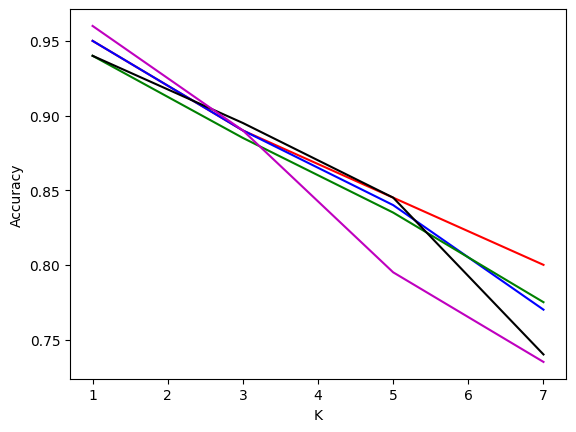

In [23]:
import matplotlib.pyplot as plt


PCA_8 = np.array([[1,0.95],[3,0.89],[5,0.845],[7,0.8]])
PCA_85 = np.array([[1,0.95],[3,0.89],[5,0.84],[7,0.77]])
PCA_9 = np.array([[1,0.94],[3,0.885],[5,0.835],[7,0.775]])
PCA_95 = np.array([[1,0.94],[3,0.895],[5,0.845],[7,0.74]])
LDA = np.array([[1,0.96],[3,0.89],[5,0.795],[7,0.735]])

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(PCA_8[:,0], PCA_8[:,1], c='r')
ax.plot(PCA_85[:,0], PCA_85[:,1], c='b')
ax.plot(PCA_9[:,0], PCA_9[:,1], c='g')
ax.plot(PCA_95[:,0], PCA_95[:,1], c='k')
ax.plot(LDA[:,0], LDA[:,1], c='m')
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')

plt.show()

7. Compare vs Non-Face Images

In [ ]:
# Code

8. Bonus

In [ ]:
# Code